# Stock price direction prediction

##Absract
For this project, we decided to work on the prediction of future stock price using custom built Keras densely-connected Neural Network models and long short-term memory (LSTM) models. We present our data's source and libraries to retrieve the data. We clean our data and apply some preprocessing on it. We mention the possible hyper-parameters that can be used in our case, and tweak them in order to find the best hyper-parameters for this task. Finally, we create a multi-input model where inputs are different size sequences of price data.

In [1]:
# Necessary dependencies
!pip install yfinance
!pip install finvizfinance

You should consider upgrading via the 'c:\users\peter\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\peter\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
from tensorflow.keras import *
import yfinance as yf
from finvizfinance.screener.overview import Overview
import matplotlib.pyplot as pl

### API Docs

"yfinance" library is used to download historical data
 - https://pypi.org/project/yfinance/

"finvizfinance" library is used to get ticker names
 - https://pypi.org/project/finvizfinance/

## Get Data

In [3]:
# Get an overview of the screener
overview = Overview()

In [4]:
# Here are the options for filters to use to filter stocks
overview.getFilters()

['Exchange',
 'Index',
 'Sector',
 'Industry',
 'Country',
 'Market Cap.',
 'P/E',
 'Forward P/E',
 'PEG',
 'P/S',
 'P/B',
 'Price/Cash',
 'Price/Free Cash Flow',
 'EPS growththis year',
 'EPS growthnext year',
 'EPS growthpast 5 years',
 'EPS growthnext 5 years',
 'Sales growthpast 5 years',
 'EPS growthqtr over qtr',
 'Sales growthqtr over qtr',
 'Dividend Yield',
 'Return on Assets',
 'Return on Equity',
 'Return on Investment',
 'Current Ratio',
 'Quick Ratio',
 'LT Debt/Equity',
 'Debt/Equity',
 'Gross Margin',
 'Operating Margin',
 'Net Profit Margin',
 'Payout Ratio',
 'InsiderOwnership',
 'InsiderTransactions',
 'InstitutionalOwnership',
 'InstitutionalTransactions',
 'Float Short',
 'Analyst Recom.',
 'Option/Short',
 'Earnings Date',
 'Performance',
 'Performance 2',
 'Volatility',
 'RSI (14)',
 'Gap',
 '20-Day Simple Moving Average',
 '50-Day Simple Moving Average',
 '200-Day Simple Moving Average',
 'Change',
 'Change from Open',
 '20-Day High/Low',
 '50-Day High/Low',
 '52

In [5]:
# We would like to retrieve stocks with the highest Market Capitalization.
# "Market capitalization refers to the total dollar market value of a company's outstanding shares of stock."
# In other words, these are the most valued stocks. The reasoning behind selecting this filter is simply that
# these are strong stocks that are traded by most investors or hedge funds.
overview.getFilterOptions('Market Cap.')

['Any',
 'Mega ($200bln and more)',
 'Large ($10bln to $200bln)',
 'Mid ($2bln to $10bln)',
 'Small ($300mln to $2bln)',
 'Micro ($50mln to $300mln)',
 'Nano (under $50mln)',
 '+Large (over $10bln)',
 '+Mid (over $2bln)',
 '+Small (over $300mln)',
 '+Micro (over $50mln)',
 '-Large (under $200bln)',
 '-Mid (under $10bln)',
 '-Small (under $2bln)',
 '-Micro (under $300mln)']

In [6]:
filters = {'Market Cap.':'+Large (over $10bln)'}
overview.set_filter(filters_dict=filters)
df = overview.ScreenerView()

In [7]:
df

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,3.962000e+10,50.35,130.45,-0.0053,150881.0
1,AAL,American Airlines Group Inc.,Industrials,Airlines,USA,1.360000e+10,None,22.83,0.0192,12984725.0
2,AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,Specialty Retail,USA,1.338000e+10,28.38,203.96,0.0057,79507.0
3,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2.085450e+12,28.6,126.10,-0.0106,22937746.0
4,ABB,ABB Ltd,Industrials,Specialty Industrial Machinery,Switzerland,7.178000e+10,139.11,33.86,-0.0105,454878.0
...,...,...,...,...,...,...,...,...,...,...
878,ZNGA,Zynga Inc.,Communication Services,Electronic Gaming & Multimedia,USA,1.075000e+10,None,10.09,-0.0142,2999781.0
879,ZNH,China Southern Airlines Company Limited,Industrials,Airlines,China,1.342000e+10,None,33.01,0.0003,1077.0
880,ZS,"Zscaler, Inc.",Technology,Software - Infrastructure,USA,2.188000e+10,None,164.24,-0.0067,316464.0
881,ZTO,ZTO Express (Cayman) Inc.,Industrials,Integrated Freight & Logistics,China,2.566000e+10,36.79,30.92,0.0029,545857.0


In [8]:
tickers = df['Ticker'].values.tolist()

In [23]:
# Now that we have the tickers, we can download historical data for these tickers.
# We will download daily data from 2019 to 2021 (2 years).
data = yf.download(tickers, start='2018-01-02', end='2021-05-03')

[*********************100%***********************]  883 of 883 completed


In [24]:
data

Adj Close                                                \
                     A        AAL         AAP        AAPL        ABB   
Date                                                                   
2018-01-02   65.777748  51.647556  104.796822   41.310070  23.338377   
2018-01-03   67.451401  51.014027  105.745117   41.302879  23.511126   
2018-01-04   66.945419  51.335667  109.646957   41.494736  23.709787   
2018-01-05   68.015762  51.316177  110.812576   41.967163  23.865261   
2018-01-08   68.161713  50.809345  110.032219   41.811283  23.839348   
...                ...        ...         ...         ...        ...   
2021-04-27  136.479996  21.760000  197.279999  134.162109  33.060001   
2021-04-28  134.800003  21.700001  197.630005  133.353485  33.290001   
2021-04-29  134.149994  21.299999  200.679993  133.253662  33.240002   
2021-04-30  133.639999  21.719999  200.160004  131.237091  32.430000   
2021-05-03         NaN        NaN         NaN         NaN        NaN   

                                                                      ...  \
                  ABBV         ABC      ABEV        ABMD        ABNB  ...   
Date                                                                  ...   
2018-01-02   82.956924   88.406036  6.048749  192.490005         NaN  ...   
2018-01-03   84.255081   88.735046  6.085353  195.820007         NaN  ...   
2018-01-04   83.774597   88.537621  6.076201  199.250000         NaN  ...   
2018-01-05   85.232941   89.609322  6.103654  202.320007         NaN  ...   
2018-01-08   83.867310   91.094681  6.057900  207.800003         NaN  ...   
...                ...         ...       ...         ...         ...  ...   
2021-04-27  111.440002  118.362434  2.820000  340.630005  177.940002  ...   
2021-04-28  111.930000  118.890480  2.850000  351.170013  180.000000  ...   
2021-04-29  110.889999  120.803406  2.890000  322.940002  177.679993  ...   
2021-04-30  111.500000  120.355064  2.780000  320.730011  172.710007  ...   
2021-05-03         NaN         NaN       NaN         NaN         NaN  ...   

               Volume                                                        \
                  ZEN        ZG         ZI      ZLAB         ZM        ZNGA   
Date                                                                          
2018-01-02   840300.0  277300.0        NaN   72300.0        NaN  12411100.0   
2018-01-03   860000.0  372700.0        NaN   79100.0        NaN  23113000.0   
2018-01-04   441200.0  255100.0        NaN   58000.0        NaN  10648300.0   
2018-01-05   490300.0  127300.0        NaN   48300.0        NaN   9962100.0   
2018-01-08   549900.0  218600.0        NaN   92600.0        NaN   8992800.0   
...               ...       ...        ...       ...        ...         ...   
2021-04-27   866100.0  317800.0  1608900.0  394200.0  2208300.0  17700700.0   
2021-04-28  1164100.0  399000.0  1174500.0  353100.0  1437600.0  12559000.0   
2021-04-29  1849400.0  303300.0   918100.0  420700.0  3121100.0   8748300.0   
2021-04-30  2576300.0  353800.0  1110200.0  421500.0  2147200.0  11300800.0   
2021-05-03        NaN       NaN        NaN       NaN        NaN         NaN   

                                                      
                ZNH         ZS        ZTO        ZTS  
Date                                                  
2018-01-02  38200.0        NaN  4857000.0  2135600.0  
2018-01-03  36300.0        NaN  2629800.0  2328200.0  
2018-01-04  14800.0        NaN  2320200.0  2534000.0  
2018-01-05  72700.0        NaN  1770800.0  2166100.0  
2018-01-08  55200.0        NaN  1337700.0  3631400.0  
...             ...        ...        ...        ...  
2021-04-27  10600.0  1365900.0  3011500.0  1323100.0  
2021-04-28   4700.0  2200000.0  3514300.0  1394600.0  
2021-04-29   9800.0  2168500.0  3063100.0  1686200.0  
2021-04-30   9200.0  1173800.0  2652200.0  2151000.0  
2021-05-03      NaN        NaN        NaN        NaN  

[841 rows x 5298 columns]

In [25]:
# The data contains multiple columns for each ticker including: open, close, low, and high price data.
# We will only need one of them.
data = data['Close']
data.shape

(841, 883)

## Preprocessing

In [26]:
# First, we see that data for some tickers at some time is unavaiable/missing ('NaN').
# To keep the price data in its original form it is best to not replace the unavailable data with zeros or averages.
# Additionally, to preserve the size of the data for each ticker, we decided to remove tickers that contain unavailable data.
data.dropna(axis=1)

""
Date
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-08
...
2021-04-27
2021-04-28
2021-04-29


In [27]:
# We find that all tickers contain at least one 'NaN' value. Thus, we experiment by setting a treshold.
# And we find that most tickers contain a single missing value. Thus, by setting the treshold to the row length - 1,
# we obtain an almost perfect data containing only one missing value.
data = data.dropna(axis=1, thresh=len(data)-10)
data.shape

(841, 803)

In [28]:
# By removing rows that contain missing values, we discover that each ticker had a missing value row at the same index.
# Thus, now our data is 'NaN' value free and we preserved the most of our data without modifying values.
data = data.dropna(axis=0)
data.shape

(838, 803)

In [29]:
# We must scale the data since different tickers have different prices
data -= data.min()
data /= data.max()

In [30]:
data.head(5)

,A,AAL,AAP,AAPL,ABB,ABBV,ABC,ABEV,ABMD,ABT,...,Z,ZBH,ZBRA,ZEN,ZG,ZLAB,ZNGA,ZNH,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.084897,0.889136,0.247195,0.069857,0.656773,0.588245,0.457457,0.856881,0.194149,0.035019,...,0.099891,0.443254,0.000000,0.000000,0.104227,0.041356,0.068771,0.612565,0.074167,0.002524
2018-01-03,0.107466,0.875986,0.254835,0.069787,0.667566,0.613814,0.464335,0.864220,0.204580,0.036826,...,0.102693,0.452031,0.005027,0.004518,0.106612,0.041865,0.080045,0.675781,0.069583,0.005728
2018-01-04,0.100643,0.882662,0.286271,0.071646,0.679978,0.604350,0.460208,0.862385,0.215324,0.035436,...,0.097890,0.450194,0.010127,0.006374,0.102618,0.040450,0.065389,0.684507,0.061667,0.009902
2018-01-05,0.115077,0.882258,0.295663,0.076223,0.689692,0.633073,0.482610,0.867890,0.224941,0.037799,...,0.100635,0.462850,0.014227,0.007342,0.104449,0.044467,0.065389,0.757223,0.058750,0.017959
2018-01-08,0.117045,0.871738,0.289375,0.074713,0.688073,0.606176,0.513657,0.858716,0.242106,0.035436,...,0.101492,0.465299,0.016887,0.009359,0.106002,0.045429,0.067644,0.741516,0.044167,0.026502


### Setup

The idea behind our learning is to provide sequences of prices to a model and make the model predict
the stock's future direction. We define this direction by the average of the 'n' future prices in contrast
to the last price in the sequence.

We define parameters such as SEQ_LEN for the length of sequences that go into the model, and N_FUTURE for the number of future prices that we aggregate to compute the labels for the sequences.

In [31]:
SEQ_LEN = 10        # Previous 10 days
N_FUTURE = 10       # Next 10 days
SPLIT = 0.3

In [32]:
def processData(data, SEQ_LEN, N_FUTURE):
    train_data, test_data = [], []

    for ticker in data.columns:
        prices = data[ticker].values
        seqs = []
        
        for i in range(SEQ_LEN, len(prices)-N_FUTURE):
            seq = prices[i-SEQ_LEN:i]

            # Next, we want to compute the price direction from the current index
            future_price_avg = np.mean(prices[i:i+N_FUTURE])
            # direction is 0 (negative) if the future price average is below the current price, otherwise direction is 1 (positive)
            price_dir = 0 if future_price_avg < prices[i] else 1       
            
            # Next, we append the direction as the label to the sequences
            # We include the price direction with the sequences so that we can shuffle the data while maintaining the labels corresponding
            # to the sequences.
            seqs.append([seq, price_dir])

        split_index = int(len(seqs) * (1 - SPLIT))
        train_data.extend(seqs[:split_index])
        # We ignore the overlap of sequences between the train data and the test data
        test_data.extend(seqs[split_index + SEQ_LEN:])

    # Shuffling
    np.random.seed(0)
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)

    # Separating features and labels
    X_train = []
    y_train = []
    for features, label in train_data:
        X_train.append(features)
        y_train.append(label)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = []
    y_test = []
    for features, label in test_data:
        X_test.append(features)
        y_test.append(label)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return (X_train, y_train), (X_test, y_test)

In [33]:
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

## Model

### Linear model

In [34]:
model1 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 32,449
Trainable params: 32,449
Non-trainable params: 0
__________________________________________________

In [35]:
log1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3589/3589 [==============================] - 33s 9ms/step - loss: 0.6831 - acc: 0.5528 - val_loss: 0.6798 - val_acc: 0.5894
Epoch 2/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6804 - acc: 0.5567 - val_loss: 0.6959 - val_acc: 0.5299
Epoch 3/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6799 - acc: 0.5566 - val_loss: 0.6886 - val_acc: 0.5272
Epoch 4/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6786 - acc: 0.5562 - val_loss: 0.6893 - val_acc: 0.5309
Epoch 5/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6775 - acc: 0.5601 - val_loss: 0.6967 - val_acc: 0.5130
Epoch 6/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6769 - acc: 0.5601 - val_loss: 0.6914 - val_acc: 0.5574
Epoch 7/50
3589/3589 [==============================] - 30s 8ms/step - loss: 0.6764 - acc: 0.5613 - val_loss: 0.6848 - val_acc: 0.5481
Epoch 8/50
3589/3589 [==============================] -

Best test acc: 0.5894104838371277


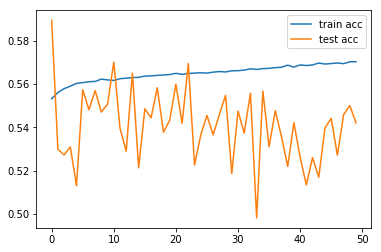

In [36]:
pl.plot(log1.history['acc'])
pl.plot(log1.history['val_acc'])
pl.legend(['train acc', "test acc"])
print(f"Best test acc: {max(log1.history['val_acc'])}")

The model's training accuracy is slowly rising, but the test accuracy is not improving over epochs.

### LSTM model

In [37]:
model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 10, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 50,581
Trainable params: 50,581
Non-trainable params: 0
__________________________________________________

In [38]:
log2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3589/3589 [==============================] - 62s 16ms/step - loss: 0.6854 - acc: 0.5498 - val_loss: 0.6861 - val_acc: 0.5300
Epoch 2/50
3589/3589 [==============================] - 57s 16ms/step - loss: 0.6839 - acc: 0.5538 - val_loss: 0.7015 - val_acc: 0.4932
Epoch 3/50
3589/3589 [==============================] - 57s 16ms/step - loss: 0.6833 - acc: 0.5522 - val_loss: 0.6842 - val_acc: 0.5574
Epoch 4/50
3589/3589 [==============================] - 57s 16ms/step - loss: 0.6824 - acc: 0.5519 - val_loss: 0.6845 - val_acc: 0.5411
Epoch 5/50
3589/3589 [==============================] - 58s 16ms/step - loss: 0.6812 - acc: 0.5525 - val_loss: 0.6809 - val_acc: 0.5740
Epoch 6/50
3589/3589 [==============================] - 57s 16ms/step - loss: 0.6802 - acc: 0.5547 - val_loss: 0.6846 - val_acc: 0.5319
Epoch 7/50
3589/3589 [==============================] - 57s 16ms/step - loss: 0.6794 - acc: 0.5552 - val_loss: 0.6838 - val_acc: 0.5483
Epoch 8/50
3589/3589 [==========================

Best test acc: 0.5740285515785217


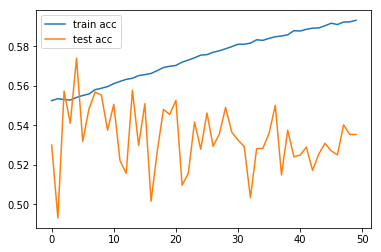

In [39]:
pl.plot(log2.history['acc'])
pl.plot(log2.history['val_acc'])
pl.legend(['train acc', "test acc"])
print(f"Best test acc: {max(log2.history['val_acc'])}")

The same phenomenon happens with the LSTM model as with the linear model.

## Different parameters

In [40]:
SEQ_LEN = 30
N_FUTURE = 10
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_1 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3501/3501 [==============================] - 61s 17ms/step - loss: 0.6852 - acc: 0.5515 - val_loss: 0.6864 - val_acc: 0.5517
Epoch 2/50
3501/3501 [==============================] - 58s 17ms/step - loss: 0.6824 - acc: 0.5562 - val_loss: 0.6961 - val_acc: 0.4986
Epoch 3/50
3501/3501 [==============================] - 59s 17ms/step - loss: 0.6788 - acc: 0.5582 - val_loss: 0.6988 - val_acc: 0.5042
Epoch 4/50
3501/3501 [==============================] - 58s 16ms/step - loss: 0.6766 - acc: 0.5616 - val_loss: 0.6923 - val_acc: 0.5384
Epoch 5/50
3501/3501 [==============================] - 58s 17ms/step - loss: 0.6730 - acc: 0.5692 - val_loss: 0.6972 - val_acc: 0.5280
Epoch 6/50
3501/3501 [==============================] - 58s 17ms/step - loss: 0.6698 - acc: 0.5741 - val_loss: 0.6959 - val_acc: 0.5182
Epoch 7/50
3501/3501 [==============================] - 58s 17ms/step - loss: 0.6681 - acc: 0.5769 - val_loss: 0.6950 - val_acc: 0.5235
Epoch 8/50
3501/3501 [==========================

In [41]:
SEQ_LEN = 10
N_FUTURE = 30
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3501/3501 [==============================] - 58s 16ms/step - loss: 0.6703 - acc: 0.5855 - val_loss: 0.6633 - val_acc: 0.5724
Epoch 2/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6670 - acc: 0.5869 - val_loss: 0.6686 - val_acc: 0.5620
Epoch 3/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6649 - acc: 0.5874 - val_loss: 0.6616 - val_acc: 0.5868
Epoch 4/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6636 - acc: 0.5879 - val_loss: 0.6646 - val_acc: 0.5584
Epoch 5/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6632 - acc: 0.5883 - val_loss: 0.6731 - val_acc: 0.5745
Epoch 6/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6617 - acc: 0.5891 - val_loss: 0.6745 - val_acc: 0.5234
Epoch 7/50
3501/3501 [==============================] - 55s 16ms/step - loss: 0.6616 - acc: 0.5876 - val_loss: 0.6598 - val_acc: 0.5697
Epoch 8/50
3501/3501 [==========================

In [42]:
SEQ_LEN = 30
N_FUTURE = 30
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_3 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3413/3413 [==============================] - 59s 17ms/step - loss: 0.6686 - acc: 0.5882 - val_loss: 0.6785 - val_acc: 0.5272
Epoch 2/50
3413/3413 [==============================] - 56s 16ms/step - loss: 0.6642 - acc: 0.5903 - val_loss: 0.6738 - val_acc: 0.5617
Epoch 3/50
3413/3413 [==============================] - 56s 16ms/step - loss: 0.6626 - acc: 0.5907 - val_loss: 0.6857 - val_acc: 0.5230
Epoch 4/50
3413/3413 [==============================] - 57s 17ms/step - loss: 0.6614 - acc: 0.5907 - val_loss: 0.6893 - val_acc: 0.5510
Epoch 5/50
3413/3413 [==============================] - 57s 17ms/step - loss: 0.6600 - acc: 0.5919 - val_loss: 0.6762 - val_acc: 0.5802
Epoch 6/50
3413/3413 [==============================] - 56s 16ms/step - loss: 0.6579 - acc: 0.5946 - val_loss: 0.6838 - val_acc: 0.5246
Epoch 7/50
3413/3413 [==============================] - 57s 17ms/step - loss: 0.6550 - acc: 0.5974 - val_loss: 0.6806 - val_acc: 0.5475
Epoch 8/50
3413/3413 [==========================

In [43]:
SEQ_LEN = 30
N_FUTURE = 60
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_4 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
3282/3282 [==============================] - 57s 16ms/step - loss: 0.6502 - acc: 0.6172 - val_loss: 0.6866 - val_acc: 0.4937
Epoch 2/50
3282/3282 [==============================] - 53s 16ms/step - loss: 0.6454 - acc: 0.6212 - val_loss: 0.6807 - val_acc: 0.4943
Epoch 3/50
3282/3282 [==============================] - 53s 16ms/step - loss: 0.6447 - acc: 0.6204 - val_loss: 0.6716 - val_acc: 0.5256
Epoch 4/50
3282/3282 [==============================] - 54s 16ms/step - loss: 0.6434 - acc: 0.6202 - val_loss: 0.6516 - val_acc: 0.5865
Epoch 5/50
3282/3282 [==============================] - 53s 16ms/step - loss: 0.6428 - acc: 0.6209 - val_loss: 0.6566 - val_acc: 0.5654
Epoch 6/50
3282/3282 [==============================] - 53s 16ms/step - loss: 0.6420 - acc: 0.6214 - val_loss: 0.6874 - val_acc: 0.5366
Epoch 7/50
3282/3282 [==============================] - 53s 16ms/step - loss: 0.6408 - acc: 0.6205 - val_loss: 0.6629 - val_acc: 0.5333
Epoch 8/50
3282/3282 [==========================

KeyboardInterrupt: 

In [ ]:
SEQ_LEN = 60
N_FUTURE = 30
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_5 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

In [ ]:
SEQ_LEN = 60
N_FUTURE = 60
(X_train, y_train), (X_test, y_test) = processData(data, SEQ_LEN, N_FUTURE)

model2 = models.Sequential([
    layers.Input(shape=(SEQ_LEN,)),
    layers.Reshape((SEQ_LEN, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log2_6 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

In [ ]:
pl.plot(log2.history['acc'])
pl.plot(log2_1.history['acc'])
pl.plot(log2_2.history['acc'])
pl.plot(log2_3.history['acc'])
pl.plot(log2_4.history['acc'])
pl.plot(log2_5.history['acc'])
pl.plot(log2_6.history['acc'])
pl.legend(["10-10", "30-10", "10-30", "30-30", "30-60", "60-30", "60-60"])
pl.title("SEQ_LEN - N_FUTURE parameters");

In terms of training accuracy, SEQ_LEN = 60 and N_FUTURE = 60 produces the best results over epochs.

We observe that as we increase both parameters the model performs better.

In [ ]:
max_val_acc = [max(log2.history['val_acc']), max(log2_1.history['val_acc']), max(log2_2.history['val_acc']), 
               max(log2_3.history['val_acc']), max(log2_4.history['val_acc']), max(log2_5.history['val_acc']), max(log2_6.history['val_acc'])]
pl.bar(["10-10", "30-10", "10-30", "30-30", "30-60", "60-30", "60-60"], max_val_acc);

In terms of testing accuracy, SEQ_LEN = 60 and N_FUTURE = 60 produces the best results.

Furthermore, we observe that the model is overfitting even with Dropout layers. We suppose the reason is due to the nature of the stock market: "Past data cannot accurately predict future data."

Nonetheless, we see some promising results with these high test accuracies at certain epochs.

Different sequence lengths can represent different trends and technical patterns in the stock price. Thus, we decide to make a model with multiple inputs corresponding to sequences with different lengths. We fix the N_FUTURE parameter to 60, and vary the SEQ_LEN between 10, 20, and 30.

## Multi Input model

In [ ]:
SEQS_LEN = [10, 20, 30]        # Previous 10, 20, 30 days
N_FUTURE = 60                  # Next 60 days
SPLIT = 0.3

In [ ]:
train_data, test_data = [[] for _ in range(len(SEQS_LEN) + 1)], [[] for _ in range(len(SEQS_LEN) + 1)]

for ticker in data.columns:
    prices = data[ticker].values
    seqs = [[] for _ in range(len(SEQS_LEN) + 1)]   # +1 for labels
    
    for i in range(max(SEQS_LEN), len(prices)-N_FUTURE):     # Starting from the largest sequence length size

        # We want to compute the price direction from the current index.
        future_price_avg = np.mean(prices[i:i+N_FUTURE])
        # direction is 0 (negative) if the future price average is below the current price, otherwise direction is 1 (positive)
        price_dir = 0 if future_price_avg < prices[i] else 1 
    
        for j in range(len(SEQS_LEN)):          # For each sequence size
            seqs[j].append( prices[i - SEQS_LEN[j] : i] )

        seqs[-1].append(price_dir)      # append labels

    for j in range(len(train_data)):
        split_index = int(len(seqs[j]) * (1 - SPLIT))
        train_data[j].extend(np.array(seqs[j])[:split_index])
        # We ignore the overlap of sequences between the train data and the test data
        test_data[j].extend(np.array(seqs[j])[split_index + max(SEQS_LEN):])

In [ ]:
np.random.seed(0)

indices = np.arange(len(train_data[0]))
np.random.shuffle(indices)
for j in range(len(train_data)):
    train_data[j] = np.array(train_data[j])[indices]

indices = np.arange(len(test_data[0]))
np.random.shuffle(indices)
for j in range(len(test_data)):
    test_data[j] = np.array(test_data[j])[indices]

In [ ]:
# Make sure the data shapes are fine
for j in range(len(test_data)):
    print(train_data[j].shape, test_data[j].shape)

### Model

In [ ]:
input1 = layers.Input(shape=(10,))
input2 = layers.Input(shape=(20,))
input3 = layers.Input(shape=(30,))

x = layers.Reshape((10, 1))(input1)
x = layers.LSTM(16)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(10, activation="relu")(x)
x = Model(inputs=input1, outputs=x)

y = layers.Reshape((20, 1))(input2)
y = layers.LSTM(32)(y)
y = layers.Dense(32, activation="relu")(y)
y = layers.Dense(10, activation="relu")(y)
y = Model(inputs=input2, outputs=y)

z = layers.Reshape((30, 1))(input3)
z = layers.LSTM(64)(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(10, activation="relu")(z)
z = Model(inputs=input3, outputs=z)

combined = layers.concatenate([x.output, y.output, z.output])

c = layers.Dense(3, activation="relu")(combined)
c = layers.Dense(1, activation="sigmoid")(c)

model3 = Model(inputs=[x.input, y.input, z.input], outputs=c)

In [ ]:
model3.summary()

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
log3 = model3.fit(train_data[:-1], train_data[-1], validation_data=(test_data[:-1], test_data[-1]), epochs=50, batch_size=64)

In [ ]:
pl.plot(log3.history['acc'])
pl.plot(log3.history['val_acc'])
pl.legend(['train acc', "test acc"])
print(f"Best test acc: {max(log3.history['val_acc'])}")

We observe that the multi sequence model does not solve the overfitting problem.

In [ ]:
pl.plot(log2_6.history['acc'])
pl.plot(log3.history['acc'])
pl.legend(["60-60", "[10,20,30]-60"])
pl.title("SEQ_LEN - N_FUTURE parameters");

In terms of training accuracy, when comparing the best parameters (SEQ_LEN=60, N_FUTURE=60) found earlier against the multi sequence model, we observe that the simple sequence model with one input performs significantly better (it converges faster over epochs).

In [ ]:
max_val_acc = [max(log2_6.history['val_acc']), max(log3.history['val_acc'])]
pl.bar(["60-60", "[10,20,30]-60"], max_val_acc);
print([max(log2_6.history['val_acc']), max(log3.history['val_acc'])])

In terms of test accuracy, when comparing the best parameters (SEQ_LEN=60, N_FUTURE=60) found earlier against the multi sequence model, we observe that the simple model outperforms once again the multi sequence model by a significant margin.